# Amtrak Dataset showing Amtrak usage 2012-2018
### Eric Englin, Volpe Center DOT


<br><br>
#### link to dataset: https://www.railpassengers.org/all-aboard/tools-info/ridership-statistics/

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from ast import literal_eval


In [16]:
Amtrak = pd.read_csv("2018_Amtrak_cleaned.csv")
station_info = pd.read_csv("stations2_cleaned.csv")


In [17]:
Amtrak["station_name"]=Amtrak["station"]
Amtrak.head()

Unnamed: 0  Year  Ridership                        city  \
0        3730  2018    93553.0                     Ventura   
1        2477  2018    91468.0                New Rochelle   
2         391  2018    90196.0                  Bridgeport   
3        2603  2018    88728.0  Oakland - Coliseum Airport   
4        3534  2018    82814.0                  Sturtevant   

                                         report type  \
0  ['\n                    Ventura, CA (VEC)\n   ...   
1  ['\n                    New Rochelle, NY (NRO)...   
2  ['\n                    Bridgeport, CT (BRP)\n...   
3  ['\n                    Oakland - Coliseum Air...   
4  ['\n                    Sturtevant, WI (SVT)\n...   

                                                 url  row_num      type  \
0  https://www.railpassengers.org//site/assets/fi...      550  stations   
1  https://www.railpassengers.org//site/assets/fi...      377  stations   
2  https://www.railpassengers.org//site/assets/fi...      100  stations   
3  https://www.railpassengers.org//site/assets/fi...      393  stations   
4  https://www.railpassengers.org//site/assets/fi...      522  stations   

                      station                station_name  
0                     Ventura                     Ventura  
1                New Rochelle                New Rochelle  
2                  Bridgeport                  Bridgeport  
3  Oakland / Coliseum Airport  Oakland / Coliseum Airport  
4                  Sturtevant                  Sturtevant

In [18]:
station_info.head()

Unnamed: 0           X          Y  OBJECTID STNCODE  \
0         185  -76.163260  39.508447       186     ABE   
1         191 -123.102774  44.630464       192     ALY   
2           8  -73.741147  42.641029         9     ALB   
3         498  -84.755814  42.247196       499     ALI   
4         106 -106.647975  35.082061       107     ABQ   

                       STNNAME              CITY2 STATE  STFIPS  \
0           Aberdeen, Maryland           Aberdeen    MD      24   
1               Albany, Oregon             Albany    OR      41   
2  Albany/Rensselaer, New York  Albany-Rensselaer    NY      36   
3             Albion, Michigan             Albion    MI      26   
4      Albuquerque, New Mexico        Albuquerque    NM      35   

                       station       station_name  
0           Aberdeen, Maryland           Aberdeen  
1               Albany, Oregon             Albany  
2  Albany/Rensselaer, New York  Albany/Rensselaer  
3             Albion, Michigan             Albion  
4      Albuquerque, New Mexico        Albuquerque

In [19]:
Amtrak_loc = Amtrak.merge(station_info, on="station_name")
Amtrak_loc.head()

Unnamed: 0_x  Year  Ridership                        city  \
0          3730  2018    93553.0                     Ventura   
1          2477  2018    91468.0                New Rochelle   
2           391  2018    90196.0                  Bridgeport   
3          2603  2018    88728.0  Oakland - Coliseum Airport   
4          3534  2018    82814.0                  Sturtevant   

                                         report type  \
0  ['\n                    Ventura, CA (VEC)\n   ...   
1  ['\n                    New Rochelle, NY (NRO)...   
2  ['\n                    Bridgeport, CT (BRP)\n...   
3  ['\n                    Oakland - Coliseum Air...   
4  ['\n                    Sturtevant, WI (SVT)\n...   

                                                 url  row_num      type  \
0  https://www.railpassengers.org//site/assets/fi...      550  stations   
1  https://www.railpassengers.org//site/assets/fi...      377  stations   
2  https://www.railpassengers.org//site/assets/fi...      100  stations   
3  https://www.railpassengers.org//site/assets/fi...      393  stations   
4  https://www.railpassengers.org//site/assets/fi...      522  stations   

                    station_x                station_name  Unnamed: 0_y  \
0                     Ventura                     Ventura           118   
1                New Rochelle                New Rochelle            96   
2                  Bridgeport                  Bridgeport            99   
3  Oakland / Coliseum Airport  Oakland / Coliseum Airport           110   
4                  Sturtevant                  Sturtevant           104   

            X          Y  OBJECTID STNCODE  \
0 -119.299918  34.276929       119     VEC   
1  -73.784329  40.911451        97     NRO   
2  -73.187539  41.178006       100     BRP   
3 -122.198147  37.752499       111     OAC   
4  -87.906300  42.718292       105     SVT   

                                         STNNAME                       CITY2  \
0                            Ventura, California                     Ventura   
1                         New Rochelle, New York                New Rochelle   
2                        Bridgeport, Connecticut                  Bridgeport   
3  Coliseum/Oakland Airport, Oakland, California  Oakland - Coliseum Airport   
4                          Sturtevant, Wisconsin                  Sturtevant   

  STATE  STFIPS                                      station_y  
0    CA       6                            Ventura, California  
1    NY      36                         New Rochelle, New York  
2    CT       9                        Bridgeport, Connecticut  
3    CA       6  Coliseum/Oakland Airport, Oakland, California  
4    WI      55                          Sturtevant, Wisconsin

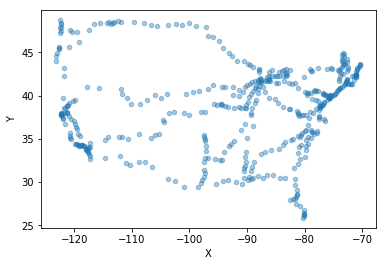

In [20]:
Amtrak_loc.plot(kind="scatter", x="X", y="Y", alpha=0.4)
plt.show()


In [27]:
Amtrak_loc.describe()

Unnamed: 0_x    Year     Ridership     row_num  Unnamed: 0_y  \
count    470.000000   470.0    461.000000  470.000000    470.000000   
mean    2076.778723  2018.0  16695.371150  323.782979    261.006383   
std     1163.419932     0.0  20186.641807  157.467767    150.923702   
min        6.000000  2018.0     70.900000   50.000000      0.000000   
25%     1085.750000  2018.0   2024.000000  187.250000    131.250000   
50%     2116.500000  2018.0   8362.000000  326.500000    262.500000   
75%     3091.250000  2018.0  23347.000000  460.750000    390.750000   
max     4045.000000  2018.0  93553.000000  593.000000    528.000000   

                X           Y    OBJECTID      STFIPS  Ridership_adjusted  
count  470.000000  470.000000  470.000000  470.000000          461.000000  
mean   -92.368185   38.690398  262.006383   27.578723          133.562969  
std     16.476496    4.994348  150.923702   15.859497          161.493134  
min   -123.102774   25.849554    1.000000    1.000000            0.567200  
25%   -105.159566   35.029998  132.250000   12.000000           16.192000  
50%    -88.152311   39.293298  263.500000   28.000000           66.896000  
75%    -78.949463   42.100569  391.750000   41.000000          186.776000  
max    -70.291258   48.720263  529.000000   55.000000          748.424000

In [39]:
def merc(Coords):
    Coordinates = literal_eval(Coords)
    lat = Coordinates[0]
    lon = Coordinates[1]
    
    r_major = 6378137.000
    x = r_major * math.radians(lon)
    scale = x/lon
    y = 180.0/math.pi * math.log(math.tan(math.pi/4.0 + 
        lat * (math.pi/180.0)/2.0)) * scale
    return (x, y)


In [43]:
long2 = []

for x in Amtrak_loc["Y"]:
    y = str(x)
    long2.append(y)

lat2 = []
for x in Amtrak_loc["X"]:
    y = str(x)
    lat2.append(y)

Amtrak_loc["long"]=long2
Amtrak_loc["lat"]=lat2

In [44]:
Amtrak_loc['Coords']= "(" + Amtrak_loc['long'] + ", " + Amtrak_loc['lat'] + ")"
Amtrak_loc[['Coords','lat','long','Y','X']].head()

Coords                  lat  \
0  (34.276928999999996, -119.29991799999999)  -119.29991799999999   
1                    (40.911451, -73.784329)           -73.784329   
2           (41.178005999999996, -73.187539)           -73.187539   
3           (37.752499, -122.19814699999999)  -122.19814699999999   
4                      (42.718292, -87.9063)             -87.9063   

                 long          Y           X  
0  34.276928999999996  34.276929 -119.299918  
1           40.911451  40.911451  -73.784329  
2  41.178005999999996  41.178006  -73.187539  
3           37.752499  37.752499 -122.198147  
4           42.718292  42.718292  -87.906300

In [45]:
Amtrak_loc['coords_x'] = Amtrak_loc['Coords'].apply(lambda x: merc(x)[0])
Amtrak_loc['coords_y'] = Amtrak_loc['Coords'].apply(lambda x: merc(x)[1])

In [53]:
from bokeh.plotting import figure, show, output_notebook, save, output_file
from bokeh.tile_providers import CARTODBPOSITRON
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Spectral6
from bokeh.transform import linear_cmap


Amtrak_loc["Ridership_adjusted"]=Amtrak_loc['Ridership']/1500

source = ColumnDataSource(data=dict(
                        x=list(Amtrak_loc['coords_x']), 
                        y=list(Amtrak_loc['coords_y']),
                        riders=list(Amtrak_loc['Ridership']),
                        sizes=list(Amtrak_loc['Ridership_adjusted']),
                        station=list(Amtrak_loc['station_name']),
                        city=list(Amtrak_loc['city'])))


hover = HoverTool(tooltips=[
    ("station", "@station"),
    ("city", "@city"),
    ("2018 riders","@riders{0,0}")
])


p = figure(plot_width=1000, plot_height=700,
           x_range=(-14000000, -7500000), y_range=(2800000, 6000000),
           x_axis_type="mercator", y_axis_type="mercator",
           tools=[hover,'reset', 'wheel_zoom','pan','box_zoom','save'],
          title="2018 Amtrak Riders")

p.add_tile(CARTODBPOSITRON)
p.title.text_font_size = '14pt'


p.circle(x='x',
         y='y',
         source=source,
         size='sizes',
         line_color="#FF0000", 
         fill_color="#FF0000",
         fill_alpha=0.05)

output_file("Amtrak Riders 2018.html")

output_notebook()
save(p)

Loading BokehJS ...

'C:\\Users\\eric.englin\\Desktop\\NACTTI\\Amtrak Riders 2018.html'